In [8]:
import qmcpy as qp
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import cProfile
import pstats

In [9]:
test_seed = 24
def natural(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural" ,thread=False)
    points = l.gen_samples(num_ports) 
    return points
def linear(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,thread=False)
    points = l.gen_samples(num_ports) 
    return points
def mps(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,thread=False)
    points = l.gen_samples(num_ports) 
    return points
def natural_thread(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural" ,thread=True)
    points = l.gen_samples(num_ports) 
    return points
def linear_thread(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,thread=True)
    points = l.gen_samples(num_ports) 
    return points
def mps_thread(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,thread=True)
    points = l.gen_samples(num_ports) 
    return points


In [10]:
trials = 5
d_list = [50, 100, 200, 500, 1400, 3500]
n = 10
data = {'Dimensions':d_list}
frame = pd.DataFrame(data)
frame = frame.set_index('Dimensions')
names = set()


run_list = [(natural, "natural"),(linear, "linear"),(mps,"mps"),(natural_thread, "natural thread"),(linear_thread,"linear thread"),(mps_thread, "mps thread")]

for method,method_name in run_list:

    name = method_name.split(" ")

    names.add(name[0])

    times = []
    
    for d in d_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(d, 2 ** n,seed=test_seed)
        profiler.disable()
        
        stats = pstats.Stats(profiler)
            
        process_time = stats.total_tt

        times.append(process_time)
        
    frame[method_name] = times  
stats.sort_stats('cumulative')


names = list(names)  

print(frame)
 


             natural    linear       mps  natural thread  linear thread  \
Dimensions                                                                
50          0.057460  0.016798  0.018645        0.048194       0.016597   
100         0.043173  0.030791  0.033995        0.042956       0.030678   
200         0.073412  0.063523  0.067867        0.069688       0.063720   
500         0.165900  0.151879  0.176780        0.139618       0.156328   
1400        0.454223  0.413733  0.453670        0.355106       0.440326   
3500        1.100936  1.037073  1.127937        0.852718       1.053400   

            mps thread  
Dimensions              
50            0.073816  
100           0.068280  
200           0.094920  
500           0.146508  
1400          0.365354  
3500          0.803139  


In [11]:
comparse= [('mps','mps thread'),('linear', 'linear thread'),('natural', 'natural thread')]



def speed_up_cal(data_frame, compare_list, dimension_list):
    result = []
    for seq,pro in compare_list:
        result = []
        for x in dimension_list:
            a = data_frame[seq][x]
            b = data_frame[pro][x]
            result.append(a/b)
        data_frame[seq + " speed-up"] = result


speed_up_cal(frame, comparse, d_list)

print(frame)




             natural    linear       mps  natural thread  linear thread  \
Dimensions                                                                
50          0.057460  0.016798  0.018645        0.048194       0.016597   
100         0.043173  0.030791  0.033995        0.042956       0.030678   
200         0.073412  0.063523  0.067867        0.069688       0.063720   
500         0.165900  0.151879  0.176780        0.139618       0.156328   
1400        0.454223  0.413733  0.453670        0.355106       0.440326   
3500        1.100936  1.037073  1.127937        0.852718       1.053400   

            mps thread  mps speed-up  linear speed-up  natural speed-up  
Dimensions                                                               
50            0.073816      0.252583         1.012086          1.192263  
100           0.068280      0.497874         1.003674          1.005059  
200           0.094920      0.714997         0.996905          1.053441  
500           0.146508      1

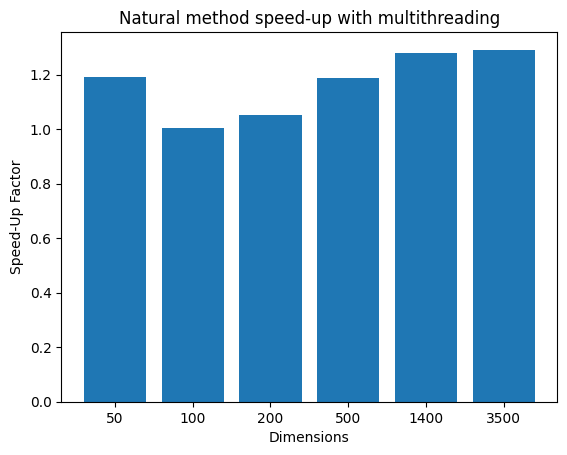

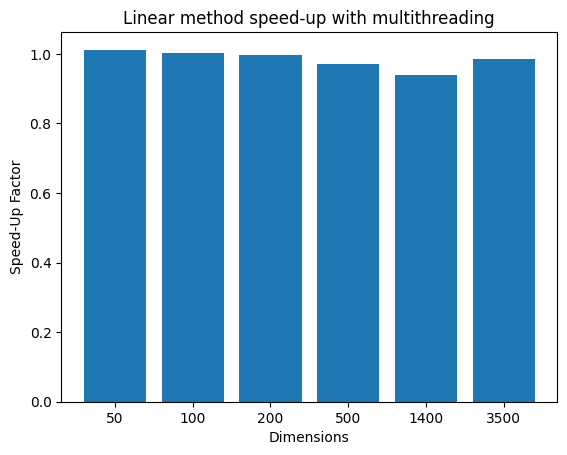

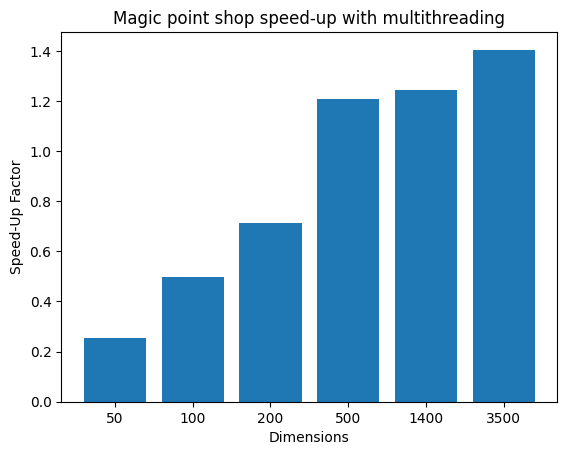

In [12]:
x = lambda array: [str(x) for x in array]

y_axis = frame["natural speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Natural method speed-up with multithreading')
plt.show()

y_axis = frame["linear speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Linear method speed-up with multithreading')
plt.show()

y_axis = frame["mps speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point shop speed-up with multithreading')
plt.show()


In [13]:
d = 10
p_list = [10, 100, 1000, 10_000, 15_000]
records = {'Points':p_list}
frame2 = pd.DataFrame(records)
frame2 = frame2.set_index('Points')
names = set()

for method, method_name in run_list:
    name = method_name.split(" ")

    names.add(name[0])


    times = []
    
    for p in p_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(2 ** d, p,seed=test_seed)
        profiler.disable()
    
        stats = pstats.Stats(profiler)
        
        process_time = stats.total_tt


        times.append(process_time)
    
    frame2[method_name] = times  
stats.sort_stats('cumulative')


names = list(names)     
speed_up_cal(frame2,comparse, p_list)
#print(frame2)

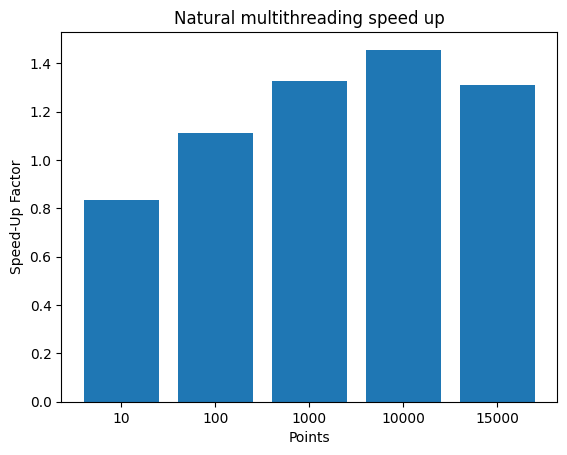

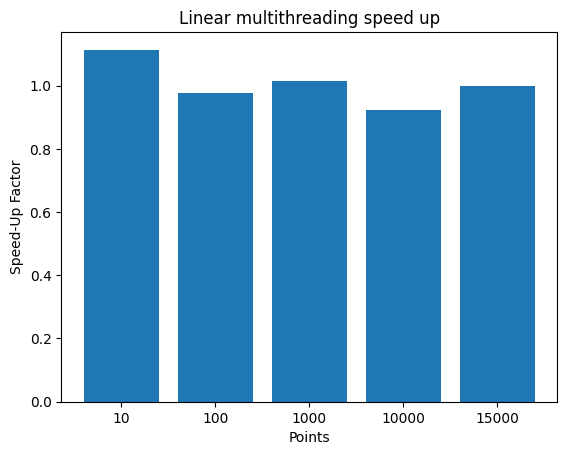

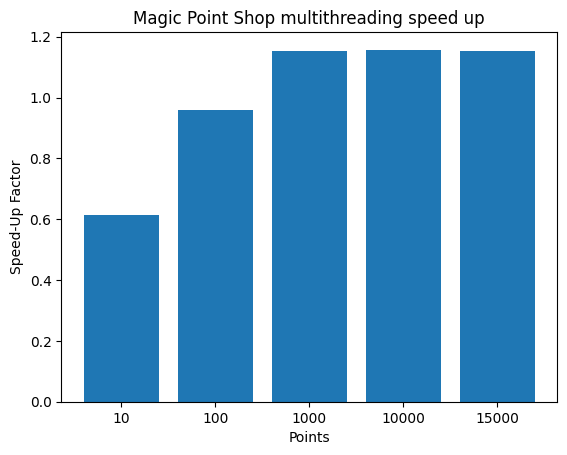

In [14]:
x = lambda array: [str(x) for x in array]

y_axis = frame2["natural speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Natural multithreading speed up')
plt.show()

y_axis = frame2["linear speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Linear multithreading speed up')
plt.show()

y_axis = frame2["mps speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Magic Point Shop multithreading speed up')
plt.show()